In [19]:
# Import the requests library.
import pandas as pd
import requests 
import json 

# Set the request parameters.

app_token = 'HXzjMR36MOwoQwjkMBYiTtL5y'  

api_endpoint = 'https://data.cdc.gov/resource/5hba-acwf.json'  

headers = {
    'X-App-Token': app_token,  
    'Content-Type': 'application/json'}

# Make the HTTP request.

response = requests.get(api_endpoint, headers=headers)  

response.json()  

# Print the JSON response from the API call.

print(json.dumps(response.json(), indent=4, sort_keys=True))

[
    {
        "datasource": "YRBSS",
        "datavalue": "29.5",
        "datavaluealt": "29.5",
        "datavaluetype": "Crude Prevalence",
        "datavaluetypeid": "CRDPREV",
        "datavalueunit": "%",
        "highconfidencelimit": "34.7",
        "locationabbr": "AZ",
        "locationdesc": "Arizona",
        "locationid": "04",
        "lowconfidencelimit": "24.9",
        "question": "Alcohol use among youth",
        "questionid": "ALC1_1",
        "stratification1": "Female",
        "stratificationcategory1": "Gender",
        "stratificationcategoryid1": "GENDER",
        "stratificationid1": "GENF",
        "topic": "Alcohol",
        "topicid": "ALC",
        "yearend": "2019",
        "yearstart": "2019"
    },
    {
        "datasource": "YRBSS",
        "datavalue": "22.5",
        "datavaluealt": "22.5",
        "datavaluetype": "Crude Prevalence",
        "datavaluetypeid": "CRDPREV",
        "datavalueunit": "%",
        "highconfidencelimit": "29.1",
      

In [20]:
data = response.json()

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Select the relevant columns for your analysis
df = df[['locationdesc', 'yearend', 'datavalue', 'question']]

# Optionally, rename the columns
df.columns = ['State', 'Year', 'ALC Rate (%)', 'Question']

# Now df is the DataFrame containing the required information
print(df.head())

            State  Year ALC Rate (%)                      Question
0         Arizona  2019         29.5       Alcohol use among youth
1            Ohio  2019         22.5       Alcohol use among youth
2   United States  2019         13.9       Alcohol use among youth
3  Virgin Islands  2015          NaN       Alcohol use among youth
4         Alabama  2020         59.1  Alcohol use before pregnancy


In [21]:
df['ALC Rate (%)'] = pd.to_numeric(df['ALC Rate (%)'], errors='coerce')


In [22]:
# fill NaN values with 0
df.fillna(0, inplace=True)
df.head()

,State,Year,ALC Rate (%),Question
0,Arizona,2019,29.5,Alcohol use among youth
1,Ohio,2019,22.5,Alcohol use among youth
2,United States,2019,13.9,Alcohol use among youth
3,Virgin Islands,2015,0.0,Alcohol use among youth
4,Alabama,2020,59.1,Alcohol use before pregnancy


In [23]:
# set state as index
df = df.set_index("State")
df

,Year,ALC Rate (%),Question
State,,,
Arizona,2019,29.5,Alcohol use among youth
Ohio,2019,22.5,Alcohol use among youth
United States,2019,13.9,Alcohol use among youth
Virgin Islands,2015,0.0,Alcohol use among youth
Alabama,2020,59.1,Alcohol use before pregnancy
...,...,...,...
Oregon,2019,0.0,Binge drinking prevalence among youth
Massachusetts,2015,0.0,Alcohol use before pregnancy
Nebraska,2017,0.0,Alcohol use among youth


In [24]:
# Data from the image
data = {
    'State': [
        'Michigan', 'Delaware', 'West Virginia', 'Ohio', 'Nebraska', 'Arkansas',
        'South Carolina', 'Kansas', 'Maine', 'Louisiana', 'Utah', 'Arizona',
        'Minnesota', 'New Jersey', 'Massachusetts', 'Wisconsin', 'Hawaii',
        'Georgia', 'Maryland', 'Mississippi'
    ],
    'Cups of Coffee': [
        2.52, 2.44, 2.35, 2.16, 2.13, 2.12, 2.12, 2.07, 2.05, 2.03,
        1.29, 1.30, 1.32, 1.45, 1.51, 1.52, 1.52, 1.54, 1.57, 1.58
    ]
}

# Create the DataFrame
df2 = pd.DataFrame(data)

# Display the DataFrame
print(df2)

             State  Cups of Coffee
0         Michigan            2.52
1         Delaware            2.44
2    West Virginia            2.35
3             Ohio            2.16
4         Nebraska            2.13
5         Arkansas            2.12
6   South Carolina            2.12
7           Kansas            2.07
8            Maine            2.05
9        Louisiana            2.03
10            Utah            1.29
11         Arizona            1.30
12       Minnesota            1.32
13      New Jersey            1.45
14   Massachusetts            1.51
15       Wisconsin            1.52
16          Hawaii            1.52
17         Georgia            1.54
18        Maryland            1.57
19     Mississippi            1.58


In [25]:
states_in_df2 = df2['State'].tolist()

filtered_df = df.loc[states_in_df2]

filtered_df

,Year,ALC Rate (%),Question
State,,,
Michigan,2011,753.0,Chronic liver disease mortality
Michigan,2013,429.0,Chronic liver disease mortality
Michigan,2012,0.0,Local authority to regulate alcohol outlet den...
Michigan,2015,0.0,Alcohol use before pregnancy
Michigan,2019,10.9,Binge drinking prevalence among youth
...,...,...,...
Mississippi,2018,0.0,Alcohol use before pregnancy
Mississippi,2012,6.3,Chronic liver disease mortality
Mississippi,2012,0.0,Chronic liver disease mortality


In [26]:
# merge two df
merged_df = pd.merge(filtered_df, df2, on="State")
merged_df


,State,Year,ALC Rate (%),Question,Cups of Coffee
0,Michigan,2011,753.0,Chronic liver disease mortality,2.52
1,Michigan,2013,429.0,Chronic liver disease mortality,2.52
2,Michigan,2012,0.0,Local authority to regulate alcohol outlet den...,2.52
3,Michigan,2015,0.0,Alcohol use before pregnancy,2.52
4,Michigan,2019,10.9,Binge drinking prevalence among youth,2.52
...,...,...,...,...,...
396,Mississippi,2018,0.0,Alcohol use before pregnancy,1.58
397,Mississippi,2012,6.3,Chronic liver disease mortality,1.58
398,Mississippi,2012,0.0,Chronic liver disease mortality,1.58
399,Mississippi,2019,17.5,Chronic liver disease mortality,1.58


In [27]:
# get rid of the too high values for ALC Rate
merged_df = merged_df[merged_df['ALC Rate (%)'] < 100]
merged_df

,State,Year,ALC Rate (%),Question,Cups of Coffee
2,Michigan,2012,0.0,Local authority to regulate alcohol outlet den...,2.52
3,Michigan,2015,0.0,Alcohol use before pregnancy,2.52
4,Michigan,2019,10.9,Binge drinking prevalence among youth,2.52
5,Michigan,2020,18.2,Chronic liver disease mortality,2.52
6,Michigan,2015,0.0,Alcohol use among youth,2.52
...,...,...,...,...,...
396,Mississippi,2018,0.0,Alcohol use before pregnancy,1.58
397,Mississippi,2012,6.3,Chronic liver disease mortality,1.58
398,Mississippi,2012,0.0,Chronic liver disease mortality,1.58
399,Mississippi,2019,17.5,Chronic liver disease mortality,1.58


In [28]:
# drop the year column and the question column
merged_df = merged_df.drop(columns=['Year', 'Question'])
merged_df


,State,ALC Rate (%),Cups of Coffee
2,Michigan,0.0,2.52
3,Michigan,0.0,2.52
4,Michigan,10.9,2.52
5,Michigan,18.2,2.52
6,Michigan,0.0,2.52
...,...,...,...
396,Mississippi,0.0,1.58
397,Mississippi,6.3,1.58
398,Mississippi,0.0,1.58
399,Mississippi,17.5,1.58


In [29]:
# get the mean of the ALC Rate and Cups of Coffee columns and only keep unique values for State
merged_df = merged_df.groupby('State').mean()       
merged_df

,ALC Rate (%),Cups of Coffee
State,,
Arizona,24.756250,1.30
Arkansas,14.063636,2.12
Delaware,17.266667,2.44
Georgia,8.738889,1.54
Hawaii,25.273913,1.52
Kansas,18.333333,2.07
Louisiana,12.511765,2.03
Maine,19.009091,2.05
Maryland,11.405882,1.57


In [30]:
# move state from the index to a column
merged_df.reset_index(inplace=True)
merged_df


,State,ALC Rate (%),Cups of Coffee
0,Arizona,24.756250,1.30
1,Arkansas,14.063636,2.12
2,Delaware,17.266667,2.44
3,Georgia,8.738889,1.54
4,Hawaii,25.273913,1.52
5,Kansas,18.333333,2.07
6,Louisiana,12.511765,2.03
7,Maine,19.009091,2.05
8,Maryland,11.405882,1.57
9,Massachusetts,13.947826,1.51


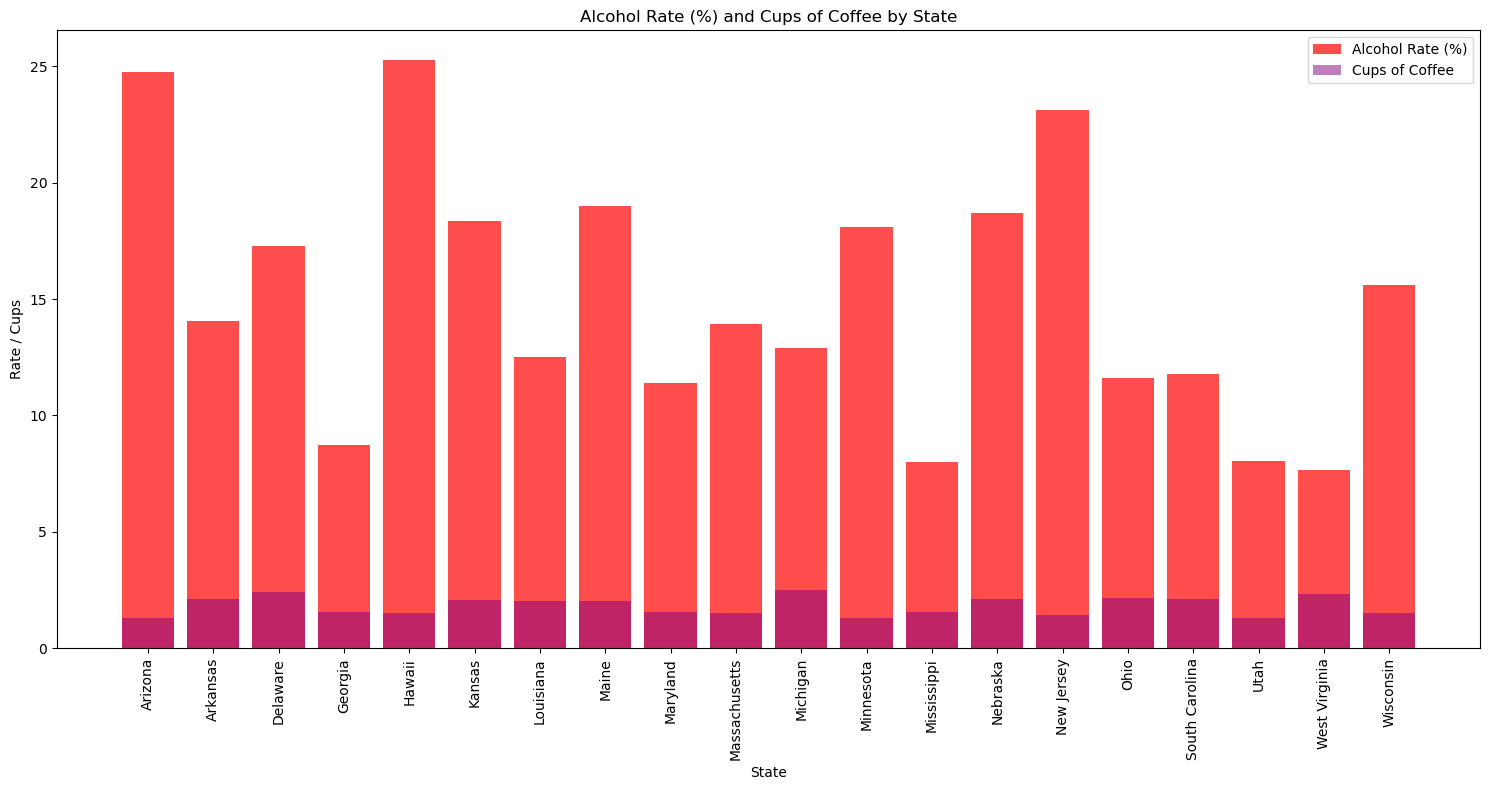

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(15, 8)) 
plt.bar(merged_df['State'], merged_df['ALC Rate (%)'], label='Alcohol Rate (%)', alpha=0.7, color='red')
plt.bar(merged_df['State'], merged_df['Cups of Coffee'], label='Cups of Coffee', alpha=0.5, color='purple')
plt.xlabel('State')
plt.ylabel('Rate / Cups')
plt.title('Alcohol Rate (%) and Cups of Coffee by State')
plt.xticks(rotation=90)  
plt.legend()
plt.tight_layout()  
plt.show()


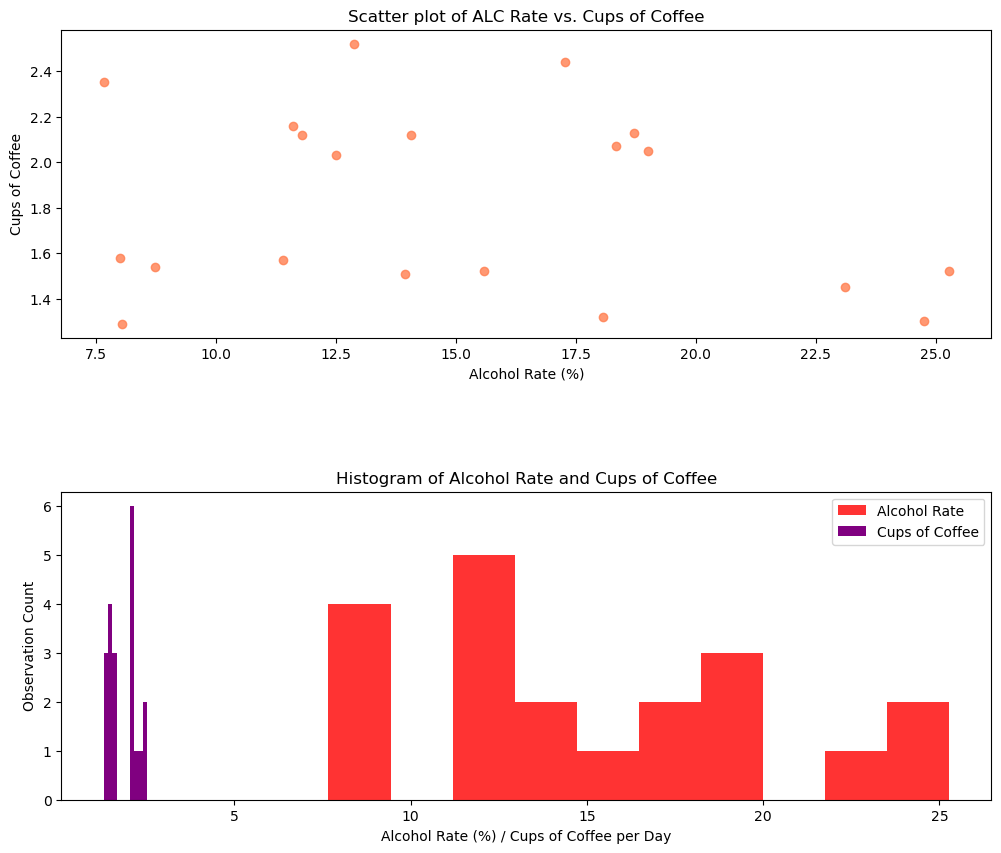

t-statistic: 10.855274131004647, p-value: 1.2225778873189365e-09


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(12, 10)) 

plt.subplot(2, 1, 1)
plt.scatter(merged_df['ALC Rate (%)'], merged_df['Cups of Coffee'], alpha=0.8, color='coral')
plt.xlabel('Alcohol Rate (%)')
plt.ylabel('Cups of Coffee')
plt.title('Scatter plot of ALC Rate vs. Cups of Coffee')
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 2)
plt.hist(merged_df['ALC Rate (%)'], alpha=0.8, label='Alcohol Rate', color='red')
plt.hist(merged_df['Cups of Coffee'], alpha=1, label='Cups of Coffee', color='purple')
plt.xlabel('Alcohol Rate (%) / Cups of Coffee per Day')
plt.ylabel('Observation Count')
plt.legend(loc='upper right')
plt.title('Histogram of Alcohol Rate and Cups of Coffee')
plt.show()

t_statistic, p_value = stats.ttest_ind(merged_df['ALC Rate (%)'], merged_df['Cups of Coffee'], equal_var=False)
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

c:\Users\Sy X\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sy X\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sy X\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sy X\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

<Figure size 1200x1000 with 0 Axes>

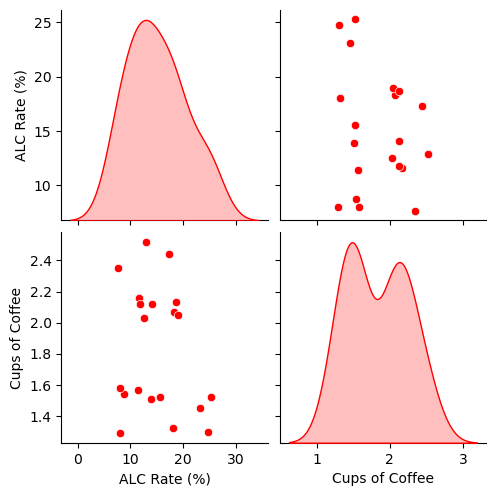

In [33]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.pairplot(merged_df, kind='scatter', diag_kind='kde', plot_kws={'color': 'red'}, diag_kws={'color': 'red'})
plt.show()

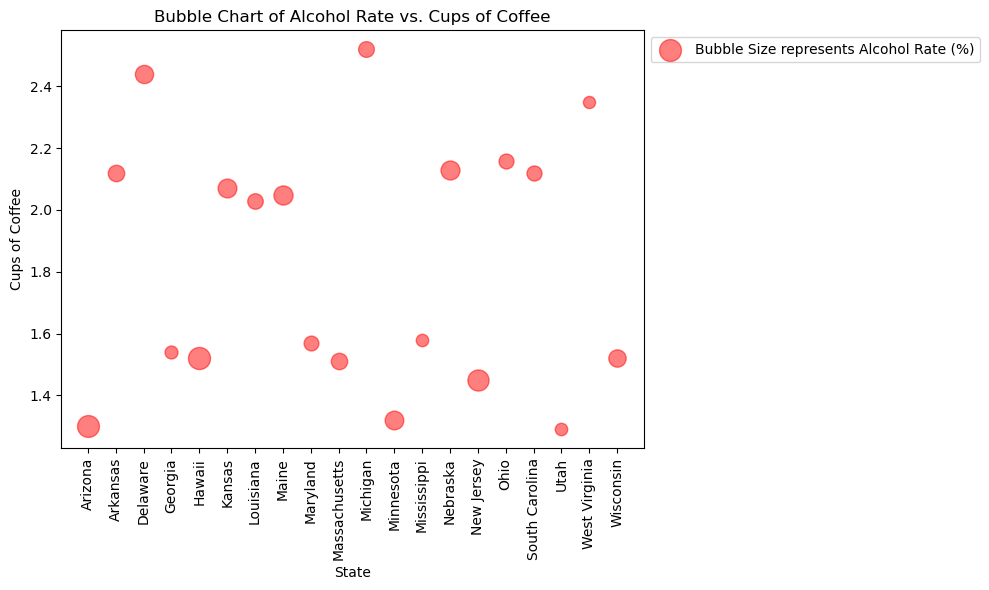

In [34]:
plt.figure(figsize=(10, 6))
bubble_size = merged_df['ALC Rate (%)'] * 10  
for i in range(len(merged_df)):
    plt.scatter(merged_df['State'][i], merged_df['Cups of Coffee'][i], s=bubble_size[i], color='red', alpha=0.5, marker='o', label=f"{merged_df['ALC Rate (%)'][i]}% ALC Rate" if i == 0 else "")

plt.xticks(rotation=90)  
plt.xlabel('State')
plt.ylabel('Cups of Coffee')
plt.title('Bubble Chart of Alcohol Rate vs. Cups of Coffee')


plt.legend(['Bubble Size represents Alcohol Rate (%)'], loc="upper left", bbox_to_anchor=(1,1), frameon=True)
plt.tight_layout()  
plt.show()

In [35]:
# Calculate the correlation coefficient between ALC Rate and Cups of Coffee
correlation = merged_df['ALC Rate (%)'].corr(merged_df['Cups of Coffee'])
print(f"Correlation between ALC Rate and Cups of Coffee: {correlation}")

Correlation between ALC Rate and Cups of Coffee: -0.20377028168623323


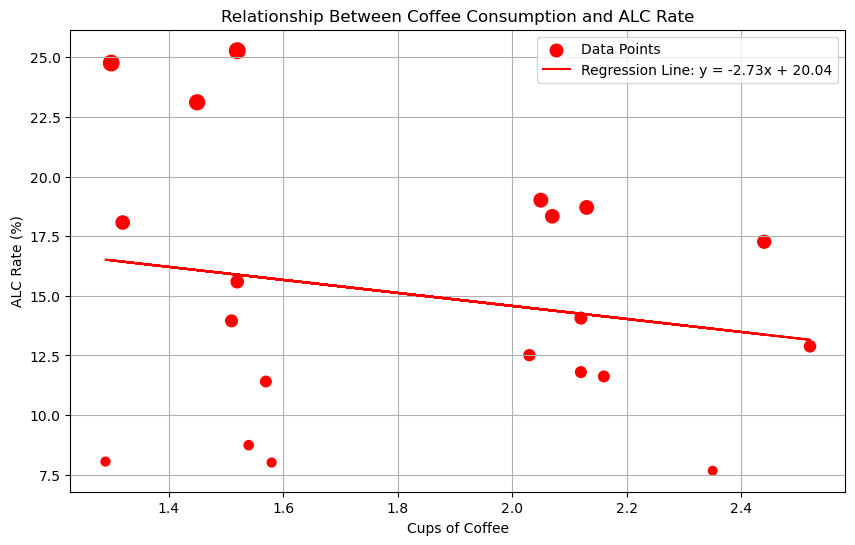

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression


X = merged_df['Cups of Coffee'].values.reshape(-1, 1)
y = merged_df['ALC Rate (%)'].values
model = LinearRegression()
model.fit(X, y)


slope = model.coef_[0]
intercept = model.intercept_


point_size = merged_df['ALC Rate (%)'] * 5  


plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Cups of Coffee'], merged_df['ALC Rate (%)'], s=point_size, color='r', label='Data Points')
plt.plot(merged_df['Cups of Coffee'], model.predict(X), color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Cups of Coffee')
plt.ylabel('ALC Rate (%)')
plt.title('Relationship Between Coffee Consumption and ALC Rate')

plt.legend(loc='upper right')

plt.grid(True)


plt.show()
